# Import Libraries

In [67]:
import functions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# for statistical tests
from scipy.stats import ttest_rel, ttest_ind, wilcoxon
from statsmodels.stats.multitest import multipletests
#from scipy.stats import shapiro, wilcoxon, pearsonr, spearmanr


In [68]:
import importlib
importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

# Loading the data

In [69]:
excel_folder_path = "data/"
FM_folder_path = "data/Raw_MissingDataImputed/"
regression_info, rsfMRI_full_info = functions.load_excel_data(excel_folder_path, FM_folder_path)
folder_path = "FC_matrices_times_wp11/"

rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]
rois_sub = rois
rois_full = np.arange(0, 379)
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

Trying to load: TiMeS_matrix_mdImputed_allT4.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT4.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT3.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT3.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT2.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT2.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT1.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT1.xlsx


In [70]:
# Folder containing the data
folder_path = "FC_matrices_times_wp11/"

#t1_matrices, t1_subjects, yeo_mat_t1_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_only')
all_matrices, all_subjects, yeo_mat_all_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='all', plot=False)
#t1_t3_matched, t1_t3_subjects, yeo_mat_t1_t3_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t3_matched')
#t1_t4_matched, t1_t4_subjects, yeo_mat_t1_t4_matched_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t4_matched')
#t1_t3_matrices, t1_t3_subjects, yeo_mat_t1_t3_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t3')
#t1_t4_matrices, t1_t4_subject, yeo_mat_t1_t4_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='t1_t4')
#matrices = functions.matrices_to_wide_df(matrices)
t1_t3_t4_matched = all_matrices.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

# Beginning

## T1_T3_T4 matched

=> means I use ttest_rel!!

Shape of T1 matrices: (26, 33, 33)
Shape of T3 matrices: (26, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 33/33 [00:01<00:00, 22.34it/s]


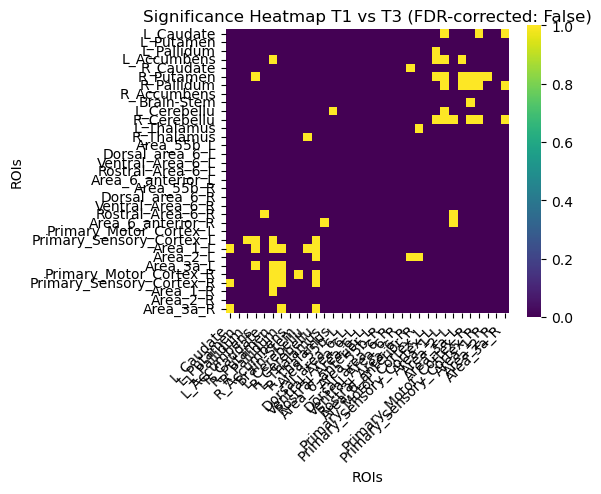

,ROI_1,ROI_2,Comparison,p_value
0,R_Caudate,Rostral_Area_6_R,R_Caudate - Rostral_Area_6_R,0.001037
1,L_Accumbens,Area_3a_L,L_Accumbens - Area_3a_L,0.001270
2,L_Accumbens,Primary_Sensory_Cortex_L,L_Accumbens - Primary_Sensory_Cortex_L,0.001690
3,L_Accumbens,Area_1_L,L_Accumbens - Area_1_L,0.004079
4,L_Caudate,Primary_Sensory_Cortex_R,L_Caudate - Primary_Sensory_Cortex_R,0.007746
5,R_Putamen,Area_3a_L,R_Putamen - Area_3a_L,0.009094
6,R_Pallidum,Primary_Sensory_Cortex_R,R_Pallidum - Primary_Sensory_Cortex_R,0.015155
7,R_Pallidum,Area_3a_R,R_Pallidum - Area_3a_R,0.016417
8,R_Putamen,Primary_Sensory_Cortex_R,R_Putamen - Primary_Sensory_Cortex_R,0.016800
9,R_Putamen,Primary_Motor_Cortex_R,R_Putamen - Primary_Motor_Cortex_R,0.018401


Shape of T1 matrices: (26, 33, 33)
Shape of T4 matrices: (26, 33, 33)


  0%|          | 0/33 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 33/33 [00:01<00:00, 19.76it/s]


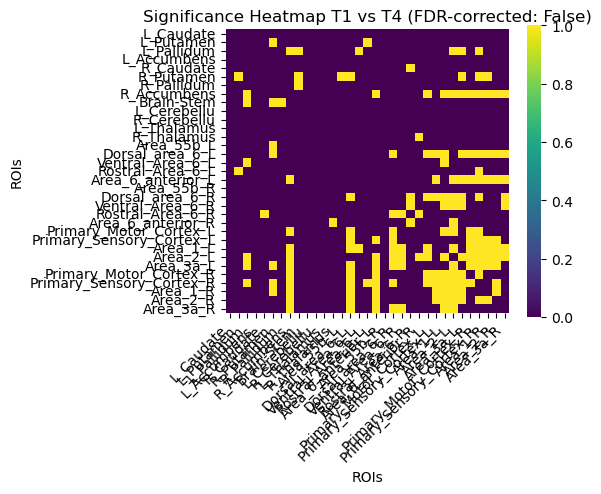

,ROI_1,ROI_2,Comparison,p_value
0,R_Caudate,Rostral_Area_6_R,R_Caudate - Rostral_Area_6_R,0.001246
1,R_Putamen,Brain-Stem,R_Putamen - Brain-Stem,0.003184
2,R_Accumbens,Area_3a_L,R_Accumbens - Area_3a_L,0.004877
3,R_Accumbens,Area_2_R,R_Accumbens - Area_2_R,0.005226
4,R_Putamen,Area_3a_L,R_Putamen - Area_3a_L,0.007014
5,L_Pallidum,Primary_Sensory_Cortex_R,L_Pallidum - Primary_Sensory_Cortex_R,0.011675
6,L_Pallidum,Brain-Stem,L_Pallidum - Brain-Stem,0.019710
7,R_Accumbens,Area_3a_R,R_Accumbens - Area_3a_R,0.020379
8,L_Pallidum,R_Accumbens,L_Pallidum - R_Accumbens,0.024130
9,R_Putamen,Area_1_R,R_Putamen - Area_1_R,0.026833


In [71]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path
roi_labels = [roi_mapping[i] for i in rois]

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=3,
    correction=False,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels, filter_striatum=True)
display(summary_df_t3)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=4,
    correction=False,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels, filter_striatum=True)
display(summary_df_t4)

## Now contra vs ipsi (correct way to call functions)

100%|██████████| 32/32 [00:01<00:00, 23.21it/s]


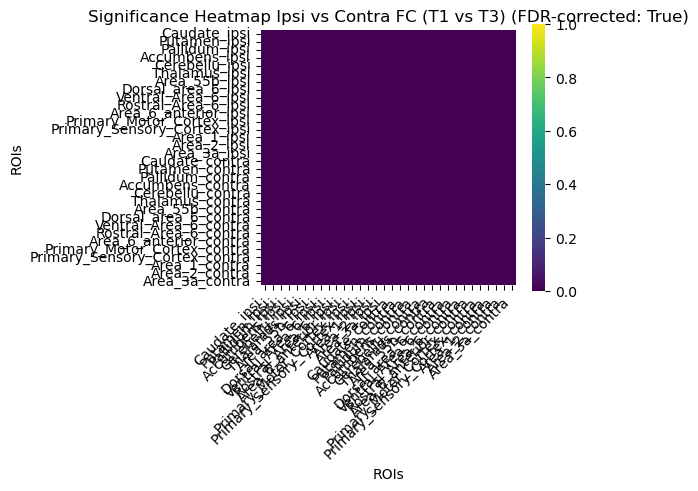

100%|██████████| 32/32 [00:01<00:00, 21.88it/s]


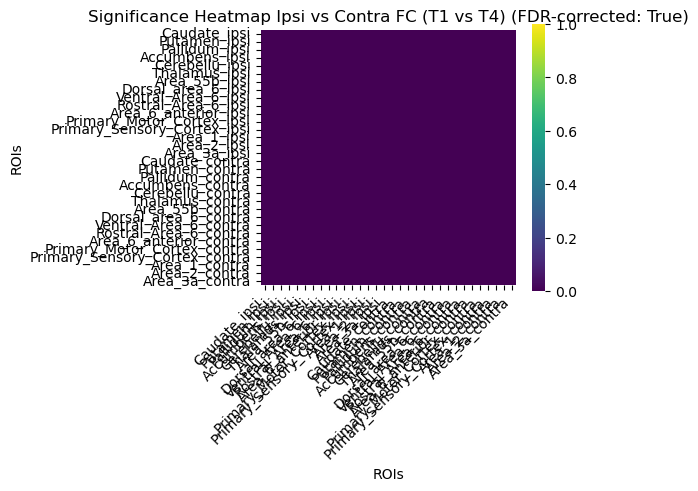

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.904421       0.843569   
Putamen_ipsi                       0.904421           NaN       0.904421   
Pallidum_ipsi                      0.843569      0.904421            NaN   
Accumbens_ipsi                     0.865909      0.506392       0.442048   
Cerebellu_ipsi                     0.904421      0.442048       0.869851   
Thalamus_ipsi                      0.986402      0.845702       0.920808   
Area_55b_ipsi                      0.616211      0.735487       0.904421   
Dorsal_area_6_ipsi                 0.988687      0.918010       0.557806   
Ventral_Area_6_ipsi                0.906396      0.688455       0.627637   
Rostral_Area_6_ipsi                0.290404      0.875542       0.904421   
Area_6_anterior_ipsi               0.988687      0.904421       0.959961   
Primary_Motor_Cortex_ipsi          0.906396      0.843569       0.843569   
Primary_Sens

In [72]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    t1_t3_t4_matched,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

## Now contra/ipsi, split L and R

NB: When splitting, use wilcoxon !!

In [73]:
df_L, df_R = functions.split_by_lesion_side(t1_t3_t4_matched)
print(f"{len(df_L)} left-lesioned subjects")
print(f"{len(df_R)} right-lesioned subjects")

8 left-lesioned subjects
17 right-lesioned subjects


### L

100%|██████████| 32/32 [00:00<00:00, 38.84it/s]


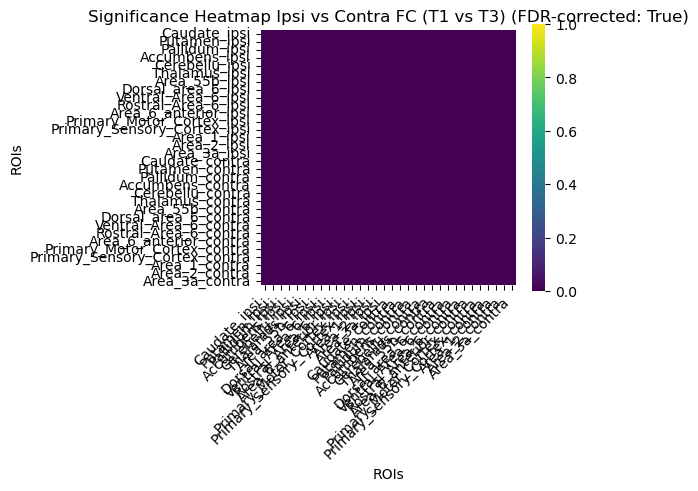

100%|██████████| 32/32 [00:00<00:00, 38.81it/s]


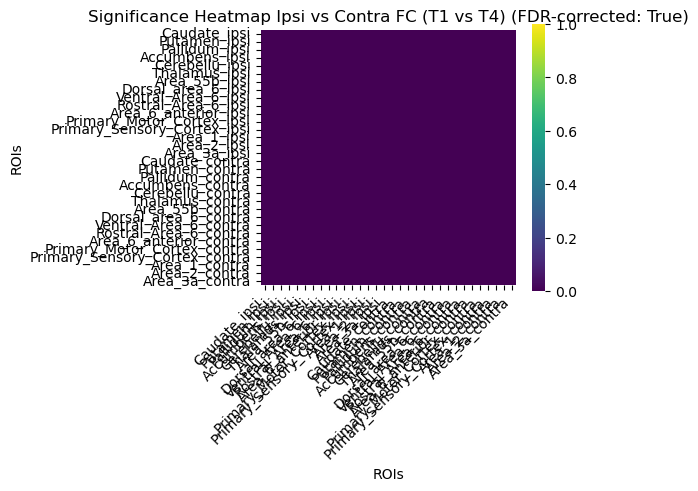

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.750969       0.807292   
Putamen_ipsi                       0.750969           NaN       1.000000   
Pallidum_ipsi                      0.807292      1.000000            NaN   
Accumbens_ipsi                     0.942878      0.961162       0.966513   
Cerebellu_ipsi                     0.910235      0.723333       0.993379   
Thalamus_ipsi                      0.779874      0.779874       0.942878   
Area_55b_ipsi                      1.000000      0.966513       0.942878   
Dorsal_area_6_ipsi                 0.723333      0.723333       0.750969   
Ventral_Area_6_ipsi                1.000000      0.910235       0.723333   
Rostral_Area_6_ipsi                0.961162      0.807292       0.961162   
Area_6_anterior_ipsi               0.993379      0.818427       0.723333   
Primary_Motor_Cortex_ipsi          0.966513      0.779874       0.961162   
Primary_Sens

In [74]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    df_L,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    df_L,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

### R

100%|██████████| 32/32 [00:01<00:00, 28.47it/s]


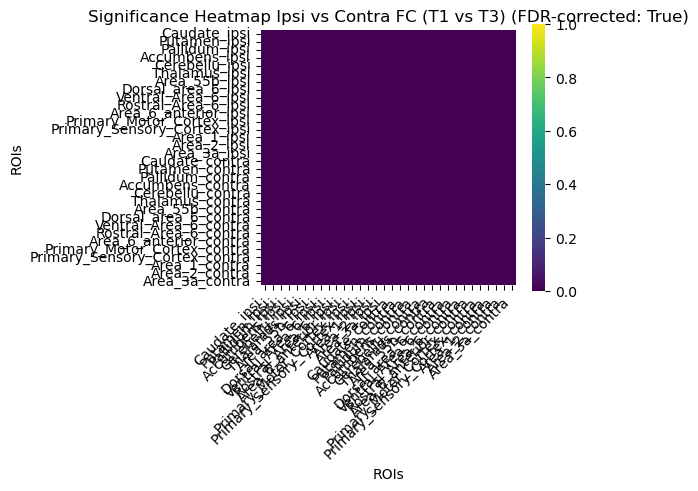

100%|██████████| 32/32 [00:01<00:00, 26.99it/s]


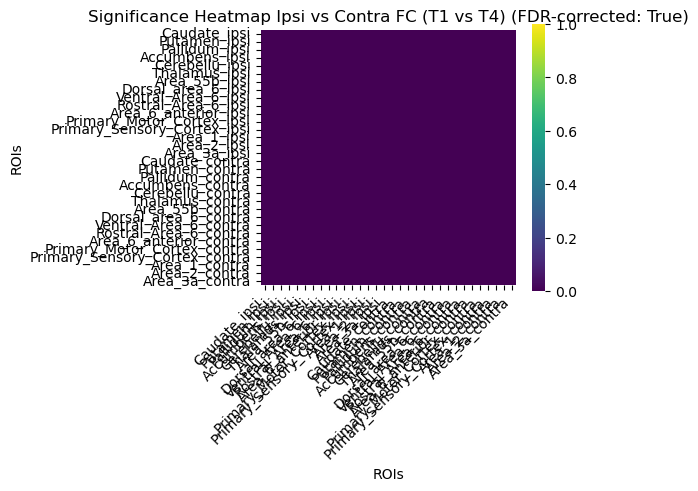

                               Caudate_ipsi  Putamen_ipsi  Pallidum_ipsi  \
Caudate_ipsi                            NaN      0.940023       0.964474   
Putamen_ipsi                       0.940023           NaN       0.889946   
Pallidum_ipsi                      0.964474      0.889946            NaN   
Accumbens_ipsi                     0.866475      0.410925       0.452264   
Cerebellu_ipsi                     0.968036      0.774451       0.878323   
Thalamus_ipsi                      0.905488      0.797874       0.993265   
Area_55b_ipsi                      0.848560      0.777561       0.925598   
Dorsal_area_6_ipsi                 0.777561      0.604410       0.866475   
Ventral_Area_6_ipsi                1.000000      0.604410       0.873452   
Rostral_Area_6_ipsi                0.410925      0.977768       0.925598   
Area_6_anterior_ipsi               0.905488      0.873452       0.797874   
Primary_Motor_Cortex_ipsi          1.000000      0.733326       0.889946   
Primary_Sens

In [75]:
roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3, labels_t3 = functions.get_sig_matrix(
    df_R,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4, labels_t4 = functions.get_sig_matrix(
    df_R,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=True,
    selected_rois=rois,
    roi_mapping=roi_mapping,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)
print(pval_df_t4)

## For yeo

### Unmatched

Shape of T1 matrices: (65, 8, 8)
Shape of T3 matrices: (44, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2
100%|██████████| 8/8 [00:00<00:00, 55.54it/s]


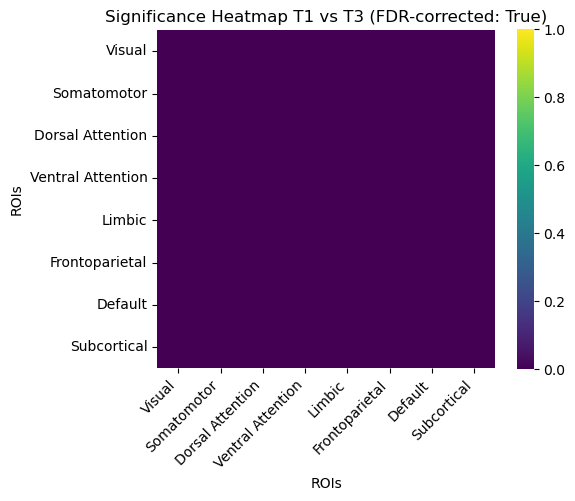

Shape of T1 matrices: (65, 8, 8)
Shape of T4 matrices: (41, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2
100%|██████████| 8/8 [00:00<00:00, 55.37it/s]


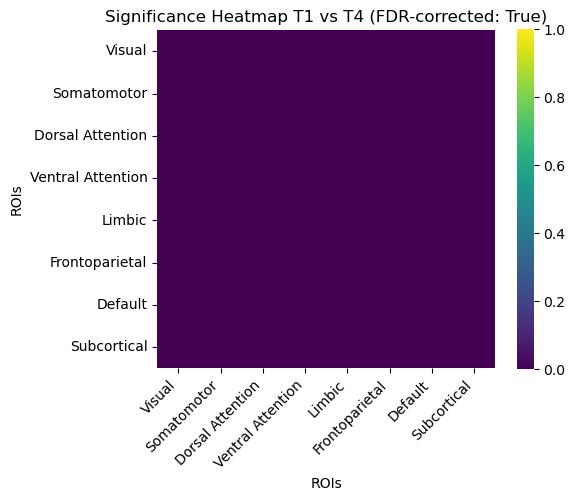

In [76]:
significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(yeo_mat_all_rois, correction=True, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
#display(summary)

significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(yeo_mat_all_rois, tp=4,correction=True, alpha=0.05, cluster=False)

summary = functions.summarize_significant_differences(
                p_vals_corrected,
                significant_matrix,
                roi_mapping_yeo,
                alpha=0.05
            )
#display(summary)

### T3/T4 matched

Shape of T1 matrices: (26, 8, 8)
Shape of T3 matrices: (26, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7718: RuntimeWarning: invalid value encountered in subtract
  d = (a - b).astype(np.float64)
100%|██████████| 8/8 [00:00<00:00, 82.70it/s]


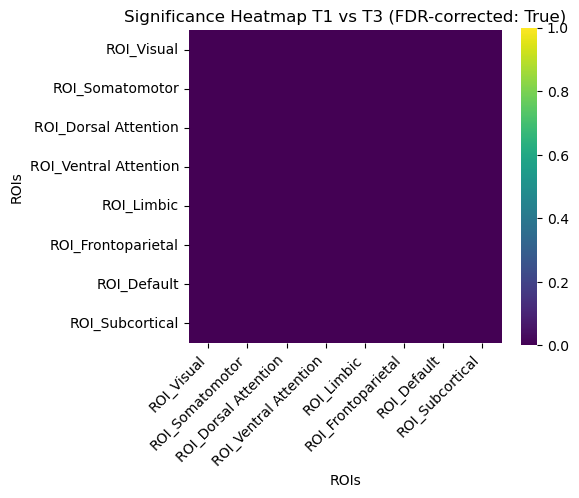

,ROI_1,ROI_2,Comparison,p_value,effect_size


,subject_id,T1_matrix,T2_matrix,T3_matrix,T4_matrix
2,s031,Visual Somatomotor Dors...,None,Visual Somatomotor Dors...,Visual Somatomotor Dors...
4,s036,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
6,s065,Visual Somatomotor Dors...,None,Visual Somatomotor Dors...,Visual Somatomotor Dors...
8,s008,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
11,s039,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
12,s006,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
13,s001,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
14,s055,Visual Somatomotor Dors...,None,Visual Somatomotor Dors...,Visual Somatomotor Dors...
17,s041,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...
34,s014,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...,Visual Somatomotor Dors...


In [ ]:

yeo_t3_t4_matched = yeo_mat_all_rois.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df, pval_df, reject_df = functions.get_sig_matrix(
    yeo_t3_t4_matched,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    selected_rois=rois,
    roi_mapping=roi_mapping_yeo
)

summary_df = functions.summarize_significant_differences(pval_df, sig_df, roi_labels=roi_mapping_yeo, filter_striatum=False)
display(summary_df)

### L/R Split (L)

In [78]:
# A NE RUN QU'UNE FOIS

# Merge 'Lesion_side' from all_matrices into yeo_t3_t4_matched based on 'subject_id'
yeo_t3_t4_matched = yeo_t3_t4_matched.merge(
    all_matrices[['subject_id', 'Lesion_side']],
    on='subject_id',
    how='left'
)

yeo_L, yeo_R = functions.split_by_lesion_side(yeo_t3_t4_matched)
print(f"{len(df_L)} left-lesioned subjects")
print(f"{len(df_R)} right-lesioned subjects")

8 left-lesioned subjects
17 right-lesioned subjects


Shape of T1 matrices: (8, 8, 8)
Shape of T3 matrices: (8, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 119.91it/s]


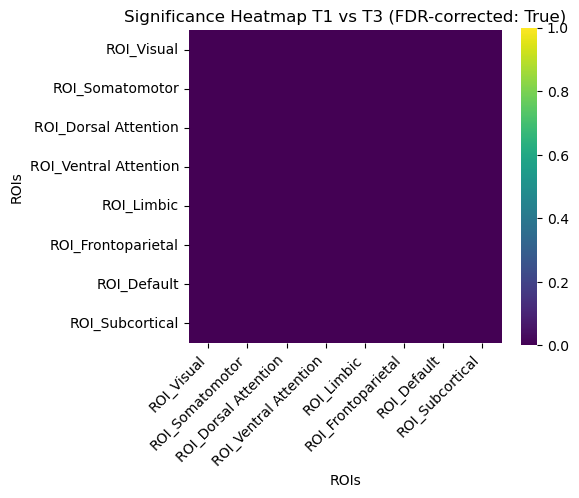

Shape of T1 matrices: (8, 8, 8)
Shape of T4 matrices: (8, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 128.73it/s]


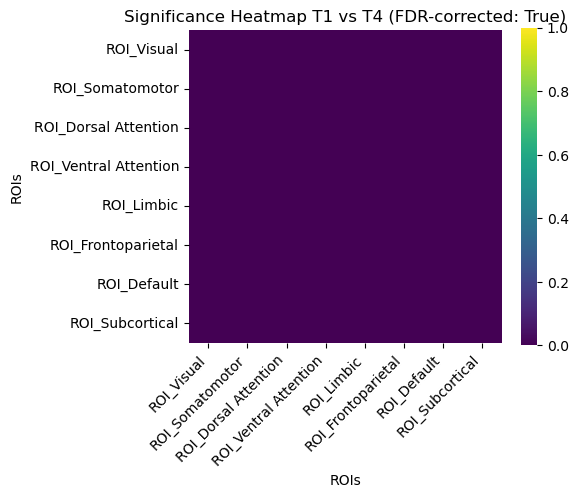

In [79]:
#roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    yeo_L,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    yeo_L,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)

### L/R Split (R)

Shape of T1 matrices: (17, 8, 8)
Shape of T3 matrices: (17, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 97.67it/s]


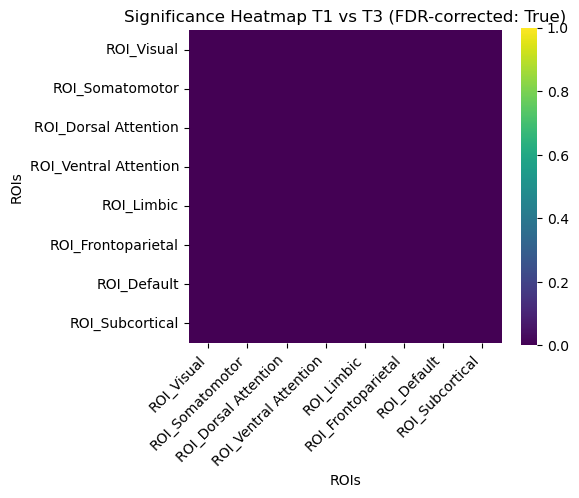

Shape of T1 matrices: (17, 8, 8)
Shape of T4 matrices: (17, 8, 8)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:67: RuntimeWarning: invalid value encountered in subtract
  d = x - y
/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:182: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
100%|██████████| 8/8 [00:00<00:00, 104.03it/s]


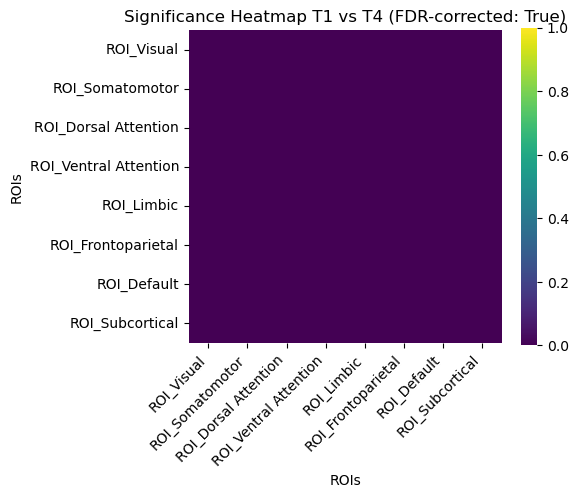

In [80]:
#roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path

sig_df_t3, pval_df_t3, reject_df_t3 = functions.get_sig_matrix(
    yeo_R,
    tp=3,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t3 = functions.summarize_significant_differences(pval_df_t3, sig_df_t3, roi_labels=labels_t3, filter_striatum=True)

sig_df_t4, pval_df_t4, reject_df_t4 = functions.get_sig_matrix(
    yeo_R,
    tp=4,
    correction=True,
    alpha=0.05,
    matched=True,
    contra_ipsi_split=False,
    roi_mapping=roi_mapping_yeo,
    test = 'wilcoxon'
)

summary_df_t4 = functions.summarize_significant_differences(pval_df_t4, sig_df_t4, roi_labels=labels_t4, filter_striatum=True)


# Homotopy

In [81]:
homotopic_pairs = [(363, 372), (364, 373), (365, 374), (368, 377), (361, 370), (362, 371), (12, 192), (54, 234), (56, 236), (78, 258), (96, 276), (8, 188), (9, 189), (51, 231), (52, 232), (53, 233)]
homotopic_pairs = [(roi[0] - 1, roi[1] - 1) for roi in homotopic_pairs]  # Adjust for zero-based indexing

homotopic_t1_t3_t4_matched = t1_t3_t4_matched.copy()

In [82]:
for fc in ['T1_matrix', 'T3_matrix', 'T4_matrix']:
    if fc in homotopic_t1_t3_t4_matched.columns:
        homotopic_t1_t3_t4_matched[fc] = homotopic_t1_t3_t4_matched[fc].apply(lambda mat: functions.compute_mean_homotopic_fc(mat, homotopic_pairs))



## No split

In [83]:
df_T1 = pd.DataFrame(homotopic_t1_t3_t4_matched['T1_matrix'])
df_T3 = pd.DataFrame(homotopic_t1_t3_t4_matched['T3_matrix'])
df_T4 = pd.DataFrame(homotopic_t1_t3_t4_matched['T4_matrix'])

shapiro_1 = functions.test_normality(df_T1)
shapiro_3 = functions.test_normality(df_T3)
shapiro_4 = functions.test_normality(df_T4)
display("Shapiro-Wilk test for T1:", shapiro_1)
display("Shapiro-Wilk test for T3:", shapiro_3)
display("Shapiro-Wilk test for T4:", shapiro_4)

'Shapiro-Wilk test for T1:'

,Variable,W,p-value,Normal? (p > alpha)
0,T1_matrix,0.929577,0.075717,True


'Shapiro-Wilk test for T3:'

,Variable,W,p-value,Normal? (p > alpha)
0,T3_matrix,0.977138,0.808131,True


'Shapiro-Wilk test for T4:'

,Variable,W,p-value,Normal? (p > alpha)
0,T4_matrix,0.979197,0.856434,True


In [84]:
t3_stat, t3_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T3_matrix'])
t4_stat, t4_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T4_matrix'])
t3_t4_stat, t3_t4_p = ttest_rel(df_T3['T3_matrix'], df_T4['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print("Mean difference T1-T3:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T3_matrix']).mean())
print("Mean difference T1-T4:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())
print("Mean difference T3-T4:", (homotopic_t1_t3_t4_matched['T3_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())

T1 vs T3: t = -1.045, p = 0.3061
T1 vs T4: t = -3.047, p = 0.0054
T4 vs T3: t = -1.645, p = 0.1125
Mean difference T1-T3: -0.03669358978006299
Mean difference T1-T4: -0.09128231091812675
Mean difference T3-T4: -0.05458872113806375


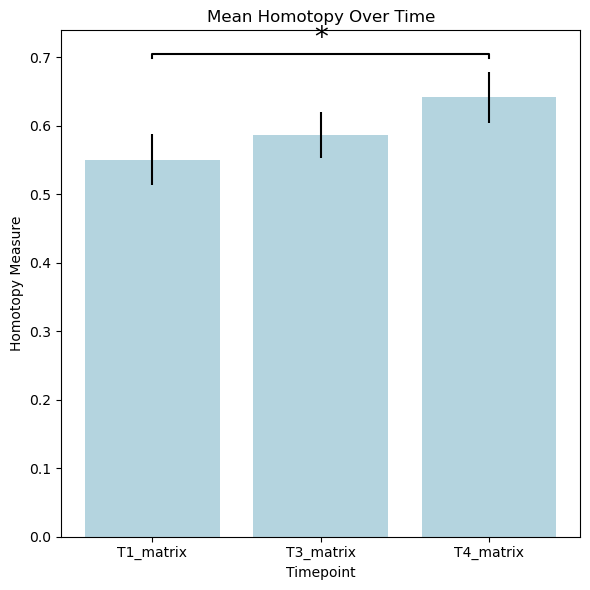

In [85]:
# Mean and standard error
homo_df = homotopic_t1_t3_t4_matched[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Homotopy Over Time')
plt.ylabel('Homotopy Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

## Split !

### L split

In [86]:
df_L, df_R = functions.split_by_lesion_side(homotopic_t1_t3_t4_matched)

t3_stat_L, t3_p_L = wilcoxon(df_L['T1_matrix'], df_L['T3_matrix'])
t4_stat_L, t4_p_L = wilcoxon(df_L['T1_matrix'], df_L['T4_matrix'])
t3_t4_stat_L, t3_t4_p_L = wilcoxon(df_L['T3_matrix'], df_L['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_L:.3f}, p = {t3_p_L:.4f}")
print(f"T1 vs T4: t = {t4_stat_L:.3f}, p = {t4_p_L:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_L:.3f}, p = {t3_t4_p_L:.4f}")

print("Mean difference T1-T3:", (df_L['T1_matrix'] - df_L['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_L['T1_matrix'] - df_L['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_L['T3_matrix'] - df_L['T4_matrix']).mean())

T1 vs T3: t = 17.000, p = 0.9453
T1 vs T4: t = 8.000, p = 0.1953
T4 vs T3: t = 12.000, p = 0.4609
Mean difference T1-T3: 0.010183388578690007
Mean difference T1-T4: -0.08957113734013736
Mean difference T3-T4: -0.09975452591882736


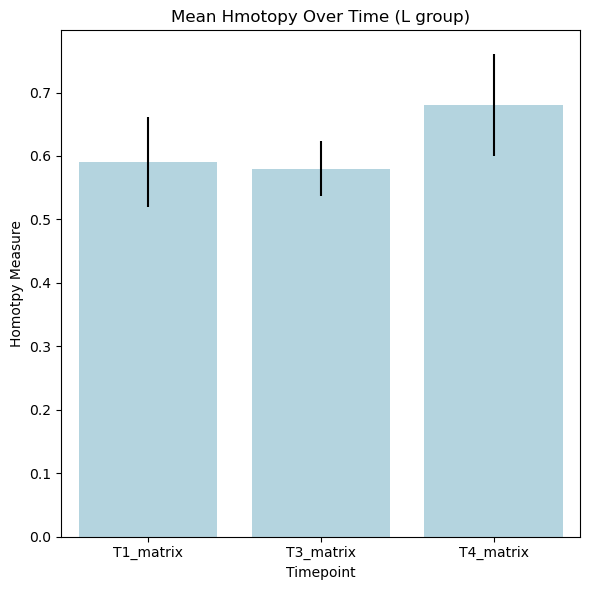

In [87]:
# Mean and standard error
homo_df = df_L[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Hmotopy Over Time (L group)')
plt.ylabel('Homotpy Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

### R split

In [88]:
t3_stat_R, t3_p_R = wilcoxon(df_R['T1_matrix'], df_R['T3_matrix'])
t4_stat_R, t4_p_R = wilcoxon(df_R['T1_matrix'], df_R['T4_matrix'])
t3_t4_stat_R, t3_t4_p_R = wilcoxon(df_R['T3_matrix'], df_R['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_R:.3f}, p = {t3_p_R:.4f}")
print(f"T1 vs T4: t = {t4_stat_R:.3f}, p = {t4_p_R:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_R:.3f}, p = {t3_t4_p_R:.4f}")

print("Mean difference T1-T3:", (df_R['T1_matrix'] - df_R['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_R['T1_matrix'] - df_R['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_R['T3_matrix'] - df_R['T4_matrix']).mean())

T1 vs T3: t = 53.000, p = 0.2842
T1 vs T4: t = 26.000, p = 0.0150
T4 vs T3: t = 45.000, p = 0.1454
Mean difference T1-T3: -0.0627187594594209
Mean difference T1-T4: -0.10158119287433688
Mean difference T3-T4: -0.038862433414915985


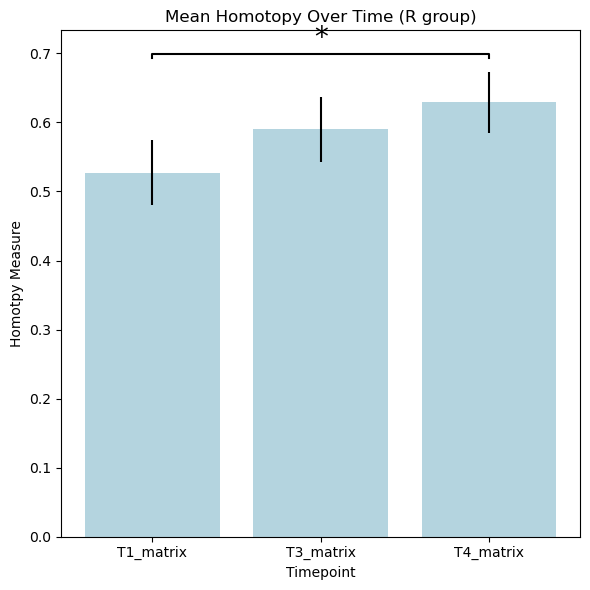

In [89]:
# Mean and standard error
homo_df = df_R[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Homotopy Over Time (R group)')
plt.ylabel('Homotpy Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

# Hemispheric symetry

## Without L/R Split

In [90]:
yeo_path = "data/hcp_mmp10_yeo7_modes_indices.csv"
region_to_yeo = functions.glasser_mapped_to_yeo(yeo_path)

# Hemisphere mapping
region_to_hemi = pd.DataFrame.from_dict(
    functions.create_roi_hemisphere_map(n_rois=379),
    orient='index',
    columns=['Hemisphere']
)

# Zero out diagonals
fc_columns = ['T1_matrix', 'T3_matrix', 'T4_matrix']
for idx, row in t1_t3_t4_matched.iterrows():
    for col in fc_columns:
        mat = row[col]
        if mat is not None:
            mat = mat.copy()
            np.fill_diagonal(mat.values, 0)
            t1_t3_t4_matched.at[idx, col] = mat

# Run symmetry computation
results = functions.compute_symmetry_from_fc_df(
    t1_t3_t4_matched,
    region_to_yeo=region_to_yeo,
    region_to_hemi=region_to_hemi
)
merged_results = results.pivot(index='subject_id', columns=['timepoint'], values='hemispheric_symmetry')
merged_results.columns.name = None  # This removes the 'timepoint' label
merged_results = merged_results.dropna().reset_index()

/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals

In [91]:
df_T1 = pd.DataFrame(merged_results['T1'])
df_T3 = pd.DataFrame(merged_results['T3'])
df_T4 = pd.DataFrame(merged_results['T4'])

shapiro_1 = functions.test_normality(df_T1)
shapiro_3 = functions.test_normality(df_T3)
shapiro_4 = functions.test_normality(df_T4)
display("Shapiro-Wilk test for T1:", shapiro_1)
display("Shapiro-Wilk test for T3:", shapiro_3)
display("Shapiro-Wilk test for T4:", shapiro_4)

'Shapiro-Wilk test for T1:'

,Variable,W,p-value,Normal? (p > alpha)
0,T1,0.955993,0.318824,True


'Shapiro-Wilk test for T3:'

,Variable,W,p-value,Normal? (p > alpha)
0,T3,0.97693,0.803042,True


'Shapiro-Wilk test for T4:'

,Variable,W,p-value,Normal? (p > alpha)
0,T4,0.953457,0.279004,True


In [92]:
t3_stat, t3_p = ttest_rel(df_T1['T1'], df_T3['T3'])
t4_stat, t4_p = ttest_rel(df_T1['T1'], df_T4['T4'])
t3_t4_stat, t3_t4_p = ttest_rel(df_T3['T3'], df_T4['T4'])

In [93]:
print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print("Mean difference T1-T3:", (df_T1['T1'] - df_T3['T3']).mean())
print("Mean difference T1-T4:", (df_T1['T1'] - df_T4['T4']).mean())
print("Mean difference T3-T4:", (df_T3['T3'] - df_T4['T4']).mean())

T1 vs T3: t = 1.181, p = 0.2486
T1 vs T4: t = -1.018, p = 0.3184
T4 vs T3: t = -2.264, p = 0.0325
Mean difference T1-T3: 0.12078927867736802
Mean difference T1-T4: -0.07432075553955167
Mean difference T3-T4: -0.19511003421691966


In [94]:
color = sns.color_palette("tab10")[0]

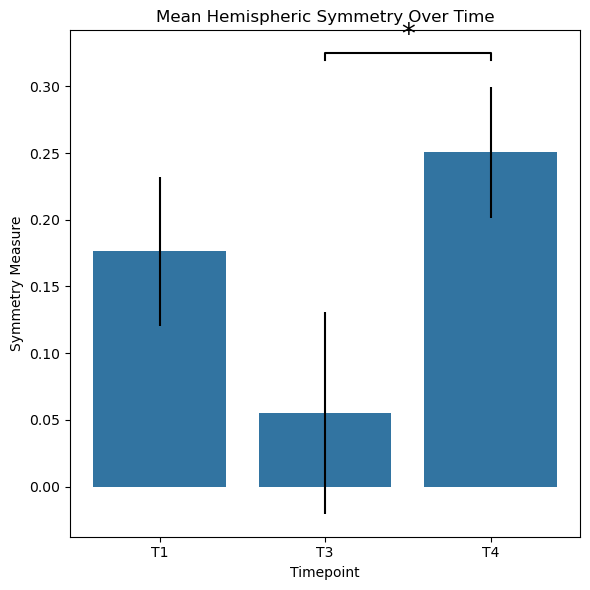

In [95]:
# Ensure data is aligned and drop NaNs
sym_df = pd.concat([df_T1['T1'], df_T3['T3'], df_T4['T4']], axis=1)
sym_df.columns = ['T1', 'T3', 'T4']
sym_df = sym_df.dropna()

# Mean and standard error
means = sym_df.mean()
errors = sym_df.std(ddof=1) / np.sqrt(sym_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color)
plt.title('Mean Hemispheric Symmetry Over Time')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df[t1], sym_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()


## With L/R Split

In [96]:
df_L, df_R = functions.split_by_lesion_side(t1_t3_t4_matched)

### R

In [97]:
yeo_path = "data/hcp_mmp10_yeo7_modes_indices.csv"
region_to_yeo = functions.glasser_mapped_to_yeo(yeo_path)

# Zero out diagonals
fc_columns = ['T1_matrix', 'T3_matrix', 'T4_matrix']
for idx, row in df_R.iterrows():
    for col in fc_columns:
        mat = row[col]
        if mat is not None:
            mat = mat.copy()
            np.fill_diagonal(mat.values, 0)
            df_R.at[idx, col] = mat

# Run symmetry computation
results = functions.compute_symmetry_from_fc_df(
    df_R,
    region_to_yeo=region_to_yeo,
    region_to_hemi=region_to_hemi
)
merged_results_R = results.pivot(index='subject_id', columns=['timepoint'], values='hemispheric_symmetry')
merged_results_R.columns.name = None  # This removes the 'timepoint' label
merged_results_R = merged_results.dropna().reset_index()


/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals

In [98]:
df_T1_R = pd.DataFrame(merged_results_R['T1'])
df_T3_R = pd.DataFrame(merged_results_R['T3'])
df_T4_R = pd.DataFrame(merged_results_R['T4'])

shapiro_1 = functions.test_normality(df_T1_R)
shapiro_3 = functions.test_normality(df_T3_R)
shapiro_4 = functions.test_normality(df_T4_R)
display("Shapiro-Wilk test for T1:", shapiro_1)
display("Shapiro-Wilk test for T3:", shapiro_3)
display("Shapiro-Wilk test for T4:", shapiro_4)

'Shapiro-Wilk test for T1:'

,Variable,W,p-value,Normal? (p > alpha)
0,T1,0.955993,0.318824,True


'Shapiro-Wilk test for T3:'

,Variable,W,p-value,Normal? (p > alpha)
0,T3,0.97693,0.803042,True


'Shapiro-Wilk test for T4:'

,Variable,W,p-value,Normal? (p > alpha)
0,T4,0.953457,0.279004,True


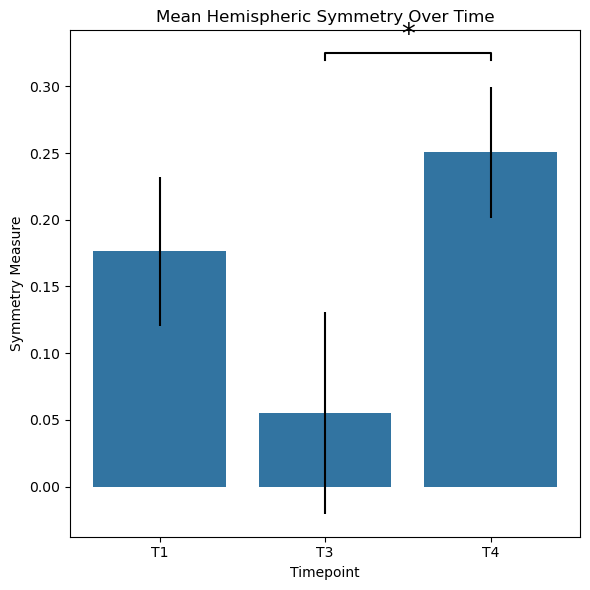

In [99]:
# Ensure data is aligned and drop NaNs
sym_df_R = pd.concat([df_T1_R['T1'], df_T3_R['T3'], df_T4_R['T4']], axis=1)
sym_df_R.columns = ['T1', 'T3', 'T4']
sym_df_R = sym_df_R.dropna()

# Mean and standard error
means = sym_df_R.mean()
errors = sym_df_R.std(ddof=1) / np.sqrt(sym_df_R.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color)
plt.title('Mean Hemispheric Symmetry Over Time')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df_R[t1], sym_df_R[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()


In [100]:
# Paired t-tests
t3_stat_R, t3_p_R = wilcoxon(df_T1_R['T1'], df_T3_R['T3'])
t4_stat_R, t4_p_R = wilcoxon(df_T1_R['T1'], df_T4_R['T4'])
t3_t4_stat_R, t3_t4_p_R = wilcoxon(df_T3_R['T3'], df_T4_R['T4'])

print(f"T1 vs T3: t = {t3_stat_R:.3f}, p = {t3_p_R:.4f}")
print(f"T1 vs T4: t = {t4_stat_R:.3f}, p = {t4_p_R:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_R:.3f}, p = {t3_t4_p_R:.4f}")

print("Mean difference T1-T3:", (df_T1_R['T1'] - df_T3_R['T3']).mean())
print("Mean difference T1-T4:", (df_T1_R['T1'] - df_T4_R['T4']).mean())
print("Mean difference T3-T4:", (df_T3_R['T3'] - df_T4_R['T4']).mean())

T1 vs T3: t = 120.000, p = 0.1651
T1 vs T4: t = 133.000, p = 0.2914
T4 vs T3: t = 96.000, p = 0.0435
Mean difference T1-T3: 0.12078927867736802
Mean difference T1-T4: -0.07432075553955167
Mean difference T3-T4: -0.19511003421691966


NB: For wilcoxon, the t value does not encode for direction of change !!

### L

In [101]:
yeo_path = "data/hcp_mmp10_yeo7_modes_indices.csv"
region_to_yeo = functions.glasser_mapped_to_yeo(yeo_path)

# Hemisphere mapping
region_to_hemi = pd.DataFrame.from_dict(
    functions.create_roi_hemisphere_map(n_rois=379),
    orient='index',
    columns=['Hemisphere']
)

# Zero out diagonals
fc_L_columns = ['T1_matrix', 'T3_matrix', 'T4_matrix']
for idx, row in df_L.iterrows():
    for col in fc_L_columns:
        mat = row[col]
        if mat is not None:
            mat = mat.copy()
            np.fill_diagonal(mat.values, 0)
            df_L.at[idx, col] = mat

# Run symmetry computation
results_L = functions.compute_symmetry_from_fc_df(
    df_L,
    region_to_yeo=region_to_yeo,
    region_to_hemi=region_to_hemi
)

/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals)
/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:1977: RuntimeWarning: Mean of empty slice
  within = np.nanmean(within_vals

In [102]:
merged_results_L = results_L.pivot(index='subject_id', columns='timepoint', values='hemispheric_symmetry')
merged_results_L.columns.name = None  # This removes the 'timepoint' label
merged_results_L = merged_results_L.dropna().reset_index()
merged_sym_L = merged_results_L.rename(columns={'T1': 'T1_matrix', 'T3': 'T3_matrix', 'T4': 'T4_matrix'})

In [103]:
df_T1_L = pd.DataFrame(merged_results_L['T1'])
df_T3_L = pd.DataFrame(merged_results_L['T3'])
df_T4_L = pd.DataFrame(merged_results_L['T4'])

shapiro_1_L = functions.test_normality(df_T1_L)
shapiro_3_L = functions.test_normality(df_T3_L)
shapiro_4_L = functions.test_normality(df_T4_L)
display("Shapiro-Wilk test for T1:", shapiro_1_L)
display("Shapiro-Wilk test for T3:", shapiro_3_L)
display("Shapiro-Wilk test for T4:", shapiro_4_L)

'Shapiro-Wilk test for T1:'

,Variable,W,p-value,Normal? (p > alpha)
0,T1,0.850439,0.096249,True


'Shapiro-Wilk test for T3:'

,Variable,W,p-value,Normal? (p > alpha)
0,T3,0.894114,0.255448,True


'Shapiro-Wilk test for T4:'

,Variable,W,p-value,Normal? (p > alpha)
0,T4,0.907795,0.338801,True


In [104]:
# Paired t-tests
t3_stat_L, t3_p_L = wilcoxon(df_T1_L['T1'], df_T3_L['T3'])
t4_stat_L, t4_p_L = wilcoxon(df_T1_L['T1'], df_T4_L['T4'])
t3_t4_stat_L, t3_t4_p_L = wilcoxon(df_T3_L['T3'], df_T4_L['T4'])

print(f"T1 vs T3: t = {t3_stat_L:.3f}, p = {t3_p_L:.4f}")
print(f"T1 vs T4: t = {t4_stat_L:.3f}, p = {t4_p_L:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_L:.3f}, p = {t3_t4_p_L:.4f}")

print("Mean difference T1-T3:", (df_T1_L['T1'] - df_T3_L['T3']).mean())
print("Mean difference T1-T4:", (df_T1_L['T1'] - df_T4_L['T4']).mean())
print("Mean difference T3-T4:", (df_T3_L['T3'] - df_T4_L['T4']).mean())

T1 vs T3: t = 13.000, p = 0.5469
T1 vs T4: t = 11.000, p = 0.3828
T4 vs T3: t = 18.000, p = 1.0000
Mean difference T1-T3: 0.2481768725156154
Mean difference T1-T4: 0.14508425716098983
Mean difference T3-T4: -0.1030926153546256


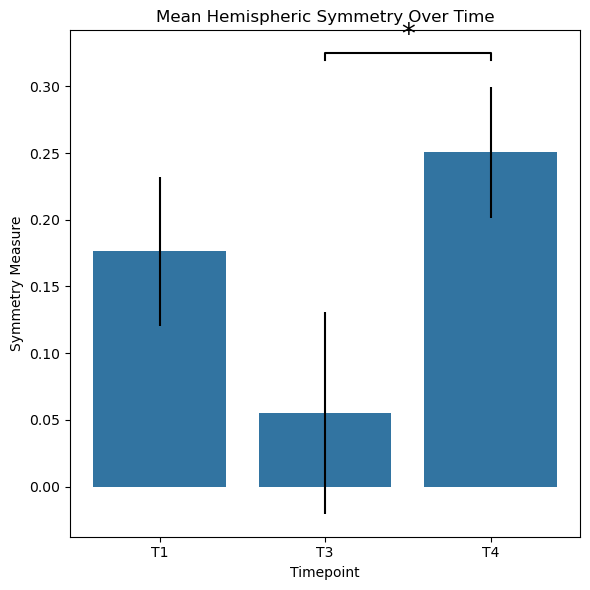

In [105]:
# Ensure data is aligned and drop NaNs
sym_df_L = pd.concat([df_T1['T1'], df_T3['T3'], df_T4['T4']], axis=1)
sym_df_L.columns = ['T1', 'T3', 'T4']
sym_df_R = sym_df_R.dropna()

# Mean and standard error
means = sym_df_R.mean()
errors = sym_df_R.std(ddof=1) / np.sqrt(sym_df_R.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color)
plt.title('Mean Hemispheric Symmetry Over Time')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df_R[t1], sym_df_R[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

# Modularity (copié collé homotopy)

In [106]:
homotopic_pairs = [(363, 372), (364, 373), (365, 374), (368, 377), (361, 370), (362, 371), (12, 192), (54, 234), (56, 236), (78, 258), (96, 276), (8, 188), (9, 189), (51, 231), (52, 232), (53, 233)]
homotopic_pairs = [(roi[0] - 1, roi[1] - 1) for roi in homotopic_pairs]  # Adjust for zero-based indexing

homotopic_t1_t3_t4_matched = t1_t3_t4_matched.copy()

In [107]:
for fc in ['T1_matrix', 'T3_matrix', 'T4_matrix']:
    if fc in homotopic_t1_t3_t4_matched.columns:
        homotopic_t1_t3_t4_matched[fc] = homotopic_t1_t3_t4_matched[fc].apply(lambda mat: functions.compute_mean_homotopic_fc(mat, homotopic_pairs))



## No split

In [108]:
df_T1 = pd.DataFrame(homotopic_t1_t3_t4_matched['T1_matrix'])
df_T3 = pd.DataFrame(homotopic_t1_t3_t4_matched['T3_matrix'])
df_T4 = pd.DataFrame(homotopic_t1_t3_t4_matched['T4_matrix'])

shapiro_1 = functions.test_normality(df_T1)
shapiro_3 = functions.test_normality(df_T3)
shapiro_4 = functions.test_normality(df_T4)
display("Shapiro-Wilk test for T1:", shapiro_1)
display("Shapiro-Wilk test for T3:", shapiro_3)
display("Shapiro-Wilk test for T4:", shapiro_4)

'Shapiro-Wilk test for T1:'

,Variable,W,p-value,Normal? (p > alpha)
0,T1_matrix,0.929577,0.075717,True


'Shapiro-Wilk test for T3:'

,Variable,W,p-value,Normal? (p > alpha)
0,T3_matrix,0.977138,0.808131,True


'Shapiro-Wilk test for T4:'

,Variable,W,p-value,Normal? (p > alpha)
0,T4_matrix,0.979197,0.856434,True


In [109]:
t3_stat, t3_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T3_matrix'])
t4_stat, t4_p = ttest_rel(homotopic_t1_t3_t4_matched['T1_matrix'], homotopic_t1_t3_t4_matched['T4_matrix'])
t3_t4_stat, t3_t4_p = ttest_rel(df_T3['T3_matrix'], df_T4['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print("Mean difference T1-T3:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T3_matrix']).mean())
print("Mean difference T1-T4:", (homotopic_t1_t3_t4_matched['T1_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())
print("Mean difference T3-T4:", (homotopic_t1_t3_t4_matched['T3_matrix'] - homotopic_t1_t3_t4_matched['T4_matrix']).mean())

T1 vs T3: t = -1.045, p = 0.3061
T1 vs T4: t = -3.047, p = 0.0054
T4 vs T3: t = -1.645, p = 0.1125
Mean difference T1-T3: -0.03669358978006299
Mean difference T1-T4: -0.09128231091812675
Mean difference T3-T4: -0.05458872113806375


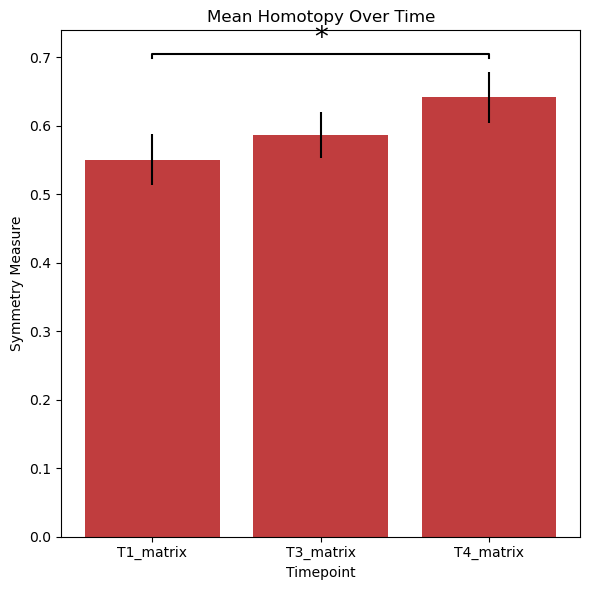

In [110]:
# Mean and standard error
homo_df = homotopic_t1_t3_t4_matched[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])
color2 = sns.color_palette("tab10")[3]
# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color2)
plt.title('Mean Homotopy Over Time')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

## Split !

### L split

In [111]:
df_L, df_R = functions.split_by_lesion_side(homotopic_t1_t3_t4_matched)

t3_stat_L, t3_p_L = wilcoxon(df_L['T1_matrix'], df_L['T3_matrix'])
t4_stat_L, t4_p_L = wilcoxon(df_L['T1_matrix'], df_L['T4_matrix'])
t3_t4_stat_L, t3_t4_p_L = wilcoxon(df_L['T3_matrix'], df_L['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_L:.3f}, p = {t3_p_L:.4f}")
print(f"T1 vs T4: t = {t4_stat_L:.3f}, p = {t4_p_L:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_L:.3f}, p = {t3_t4_p_L:.4f}")

print("Mean difference T1-T3:", (df_L['T1_matrix'] - df_L['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_L['T1_matrix'] - df_L['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_L['T3_matrix'] - df_L['T4_matrix']).mean())

T1 vs T3: t = 17.000, p = 0.9453
T1 vs T4: t = 8.000, p = 0.1953
T4 vs T3: t = 12.000, p = 0.4609
Mean difference T1-T3: 0.010183388578690007
Mean difference T1-T4: -0.08957113734013736
Mean difference T3-T4: -0.09975452591882736


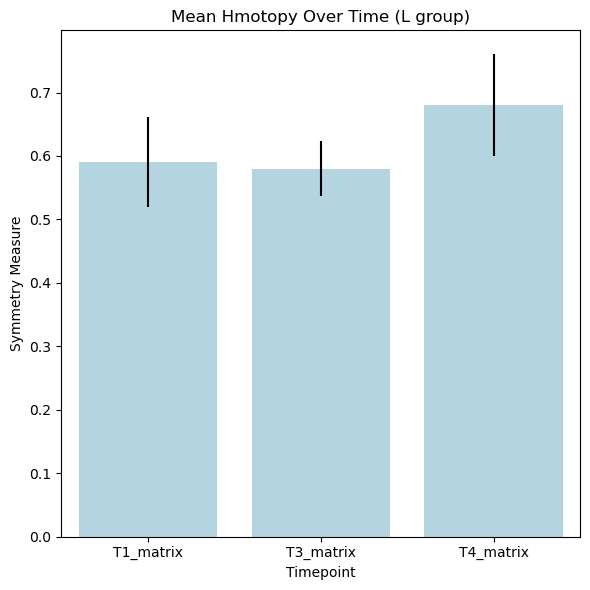

In [112]:
# Mean and standard error
homo_df = df_L[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Hmotopy Over Time (L group)')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

### R split

In [113]:
t3_stat_R, t3_p_R = wilcoxon(df_R['T1_matrix'], df_R['T3_matrix'])
t4_stat_R, t4_p_R = wilcoxon(df_R['T1_matrix'], df_R['T4_matrix'])
t3_t4_stat_R, t3_t4_p_R = wilcoxon(df_R['T3_matrix'], df_R['T4_matrix'])

print(f"T1 vs T3: t = {t3_stat_R:.3f}, p = {t3_p_R:.4f}")
print(f"T1 vs T4: t = {t4_stat_R:.3f}, p = {t4_p_R:.4f}")
print(f"T4 vs T3: t = {t3_t4_stat_R:.3f}, p = {t3_t4_p_R:.4f}")

print("Mean difference T1-T3:", (df_R['T1_matrix'] - df_R['T3_matrix']).mean())
print("Mean difference T1-T4:", (df_R['T1_matrix'] - df_R['T4_matrix']).mean())
print("Mean difference T3-T4:", (df_R['T3_matrix'] - df_R['T4_matrix']).mean())

T1 vs T3: t = 53.000, p = 0.2842
T1 vs T4: t = 26.000, p = 0.0150
T4 vs T3: t = 45.000, p = 0.1454
Mean difference T1-T3: -0.0627187594594209
Mean difference T1-T4: -0.10158119287433688
Mean difference T3-T4: -0.038862433414915985


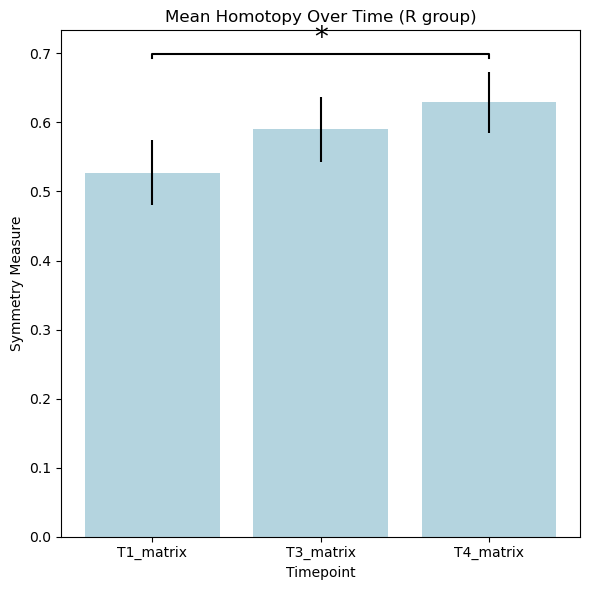

In [114]:
# Mean and standard error
homo_df = df_R[['T1_matrix', 'T3_matrix', 'T4_matrix']]
means = homo_df.mean()
errors = homo_df.std(ddof=1) / np.sqrt(homo_df.shape[0])

# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='lightblue')
plt.title('Mean Homotopy Over Time (R group)')
plt.ylabel('Symmetry Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1_matrix', 'T3_matrix'), ('T1_matrix', 'T4_matrix'), ('T3_matrix', 'T4_matrix')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = ttest_rel(homo_df[t1], homo_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

# Trying to apply modularity (tests.ipynb)

Which network matrices can I use with the Brain Connectivity Toolbox? 

- Most functions do not explicitly check the validity of the input network matrices; it is crucial to manually ensure that these matrices are suitable for their intended use.

- The network matrices should be square; rows and columns in these matrices should represent network nodes, matrix entries should represent network links.

- The network matrices should not be too small. As a rule of thumb, the toolbox is designed to be used with networks of greater than 20 nodes.

- The network matrices should preferably be in double-precision and non-sparse formats. Sparse, single-precision or logical formats may sometimes cause errors.

- The network matrices may be binary or weighted, directed or undirected. Each function specifies the network type for which it is suitable.

- The network matrices should not contain self-self connections. In other words, all values on the main diagonal of these matrices should be set to 0.

- In most cases, the network matrices should not contain negative weights. However, a substantial number of functions can process matrices with positive and negative weights. These functions typically end with sign.m (for signed networks).

- In general, randomization functions are designed for non-dense matrices; many randomization functions will be too slow and/or ineffective in dense matrices. However, some randomization functions are specifically designed for dense and weighted matrices.

## Without L/R split

In [115]:
# Start with subject_id as a column, not an index
modularity_df = t1_t3_t4_matched[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in t1_t3_t4_matched.columns:
        modularity_df[tp] = t1_t3_t4_matched[tp].apply(functions.compute_modularity)

In [116]:
normal = functions.test_normality(modularity_df)
print(normal)

    Variable         W   p-value  Normal? (p > alpha)
0  T1_matrix  0.969908  0.620952                 True
1  T2_matrix  0.950438  0.322214                 True
2  T3_matrix  0.966235  0.528669                 True
3  T4_matrix  0.980720  0.888813                 True


In [117]:
# Drop rows with missing values
t1_t3 = modularity_df[['T1_matrix', 'T3_matrix']].dropna()
t1_t4 = modularity_df[['T1_matrix', 'T4_matrix']].dropna()
t3_t4 = modularity_df[['T3_matrix', 'T4_matrix']].dropna()

# Paired t-tests
t3_stat, t3_p = ttest_rel(t1_t3['T1_matrix'], t1_t3['T3_matrix'])
t4_stat, t4_p = ttest_rel(t1_t4['T1_matrix'], t1_t4['T4_matrix'])
t3_t4_stat, t3_t4_p = ttest_rel(t3_t4['T3_matrix'], t3_t4['T4_matrix'])
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")

print("Mean difference T1-T3:", (t1_t3['T1_matrix'] - t1_t3['T3_matrix']).mean())
print("Mean difference T1-T4:", (t1_t4['T1_matrix'] - t1_t4['T4_matrix']).mean())
print("Mean difference T3-T4:", (t3_t4['T3_matrix'] - t3_t4['T4_matrix']).mean())

T4 vs T3: t = 0.199, p = 0.8438
T1 vs T3: t = 2.116, p = 0.0445
T1 vs T4: t = 2.068, p = 0.0492
Mean difference T1-T3: 0.03181459640015047
Mean difference T1-T4: 0.03457002573023214
Mean difference T3-T4: 0.0027554293300816666


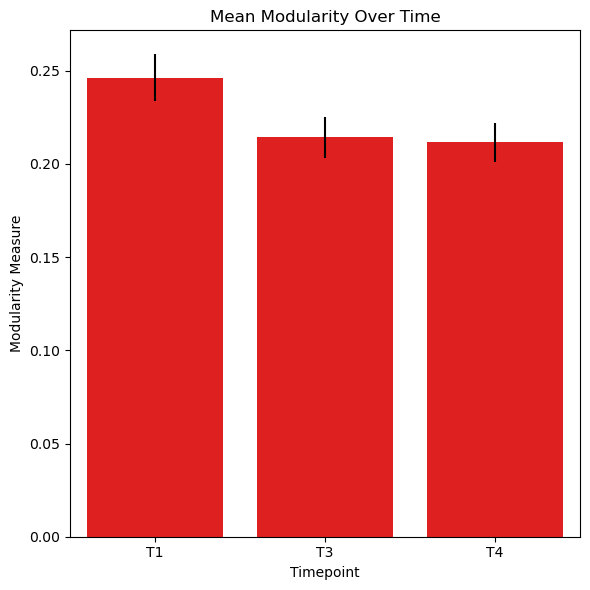

In [118]:
df_T1 = pd.DataFrame(t1_t3['T1_matrix'])
df_T3 = pd.DataFrame(t3_t4['T3_matrix'])
df_T4 = pd.DataFrame(t1_t4['T4_matrix'])

# Ensure data is aligned and drop NaNs
sym_df = pd.concat([df_T1['T1_matrix'], df_T3['T3_matrix'], df_T4['T4_matrix']], axis=1)
sym_df.columns = ['T1', 'T3', 'T4']
sym_df = sym_df.dropna()

# Mean and standard error
means = sym_df.mean()
errors = sym_df.std(ddof=1) / np.sqrt(sym_df.shape[0])
color = sns.color_palette("tab10")[3]
# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color='red')
plt.title('Mean Modularity Over Time')
plt.ylabel('Modularity Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df[t1], sym_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

## With L/R Split, L

In [119]:
df_L, df_R = functions.split_by_lesion_side(t1_t3_t4_matched)

L group too small !! doesn't work

In [120]:
# Start with subject_id as a column, not an index
modularity_L = df_L[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in df_L.columns:
        modularity_L[tp] = df_L[tp].apply(functions.compute_modularity)

# Drop rows with missing values
t1_t3 = modularity_L[['T1_matrix', 'T3_matrix']].dropna()
t1_t4 = modularity_L[['T1_matrix', 'T4_matrix']].dropna()
t3_t4 = modularity_L[['T3_matrix', 'T4_matrix']].dropna()

# Paired t-tests
t3_stat, t3_p = wilcoxon(t1_t3['T1_matrix'], t1_t3['T3_matrix'])
t4_stat, t4_p = wilcoxon(t1_t4['T1_matrix'], t1_t4['T4_matrix'])
t3_t4_stat, t3_t4_p = wilcoxon(t3_t4['T3_matrix'], t3_t4['T4_matrix'])
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print("Mean difference T1-T3:", (t1_t3['T1_matrix'] - t1_t3['T3_matrix']).mean())
print("Mean difference T1-T4:", (t1_t4['T1_matrix'] - t1_t4['T4_matrix']).mean())
print("Mean difference T3-T4:", (t3_t4['T3_matrix'] - t3_t4['T4_matrix']).mean())

T4 vs T3: t = 8.000, p = 0.1953
T1 vs T3: t = 8.000, p = 0.1953
T1 vs T4: t = 11.000, p = 0.3828
Mean difference T1-T3: -0.021618821688538355
Mean difference T1-T4: 0.015265831950980656
Mean difference T3-T4: 0.03688465363951901


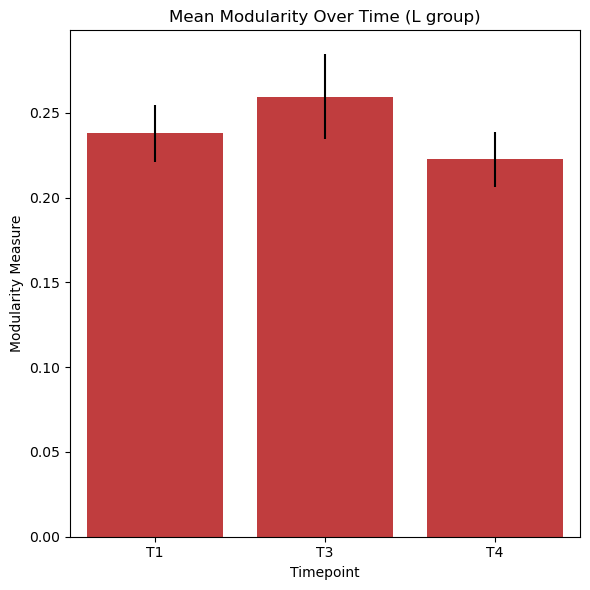

In [121]:
df_T1 = pd.DataFrame(t1_t3['T1_matrix'])
df_T3 = pd.DataFrame(t3_t4['T3_matrix'])
df_T4 = pd.DataFrame(t1_t4['T4_matrix'])

# Ensure data is aligned and drop NaNs
sym_df = pd.concat([df_T1['T1_matrix'], df_T3['T3_matrix'], df_T4['T4_matrix']], axis=1)
sym_df.columns = ['T1', 'T3', 'T4']
sym_df = sym_df.dropna()

# Mean and standard error
means = sym_df.mean()
errors = sym_df.std(ddof=1) / np.sqrt(sym_df.shape[0])
color = sns.color_palette("tab10")[3]
# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color)
plt.title('Mean Modularity Over Time (L group)')
plt.ylabel('Modularity Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df[t1], sym_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

## L/R Split, R

In [122]:
# Start with subject_id as a column, not an index
modularity_R = df_R[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in df_L.columns:
        modularity_R[tp] = df_R[tp].apply(functions.compute_modularity)

# Drop rows with missing values
t1_t3 = modularity_R[['T1_matrix', 'T3_matrix']].dropna()
t1_t4 = modularity_R[['T1_matrix', 'T4_matrix']].dropna()
t3_t4 = modularity_R[['T3_matrix', 'T4_matrix']].dropna()

# Paired t-tests
t3_stat, t3_p = wilcoxon(t1_t3['T1_matrix'], t1_t3['T3_matrix'])
t4_stat, t4_p = wilcoxon(t1_t4['T1_matrix'], t1_t4['T4_matrix'])
t3_t4_stat, t3_t4_p = wilcoxon(t3_t4['T3_matrix'], t3_t4['T4_matrix'])
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")
print("Mean difference T1-T3:", (t1_t3['T1_matrix'] - t1_t3['T3_matrix']).mean())
print("Mean difference T1-T4:", (t1_t4['T1_matrix'] - t1_t4['T4_matrix']).mean())
print("Mean difference T3-T4:", (t3_t4['T3_matrix'] - t3_t4['T4_matrix']).mean())

T4 vs T3: t = 61.000, p = 0.4874
T1 vs T3: t = 24.000, p = 0.0110
T1 vs T4: t = 44.000, p = 0.1324
Mean difference T1-T3: 0.057688693384425914
Mean difference T1-T4: 0.04289061727981921
Mean difference T3-T4: -0.014798076104606699


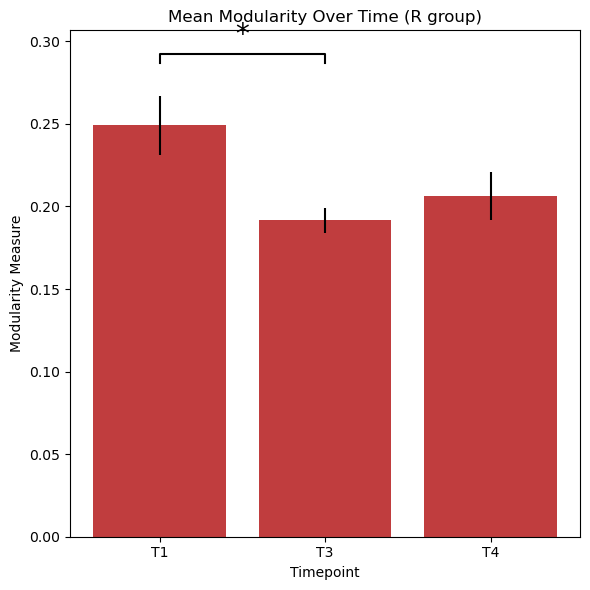

In [123]:
df_T1 = pd.DataFrame(t1_t3['T1_matrix'])
df_T3 = pd.DataFrame(t3_t4['T3_matrix'])
df_T4 = pd.DataFrame(t1_t4['T4_matrix'])

# Ensure data is aligned and drop NaNs
sym_df = pd.concat([df_T1['T1_matrix'], df_T3['T3_matrix'], df_T4['T4_matrix']], axis=1)
sym_df.columns = ['T1', 'T3', 'T4']
sym_df = sym_df.dropna()

# Mean and standard error
means = sym_df.mean()
errors = sym_df.std(ddof=1) / np.sqrt(sym_df.shape[0])
color = sns.color_palette("tab10")[3]
# Plotting
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=means.index, y=means.values, yerr=errors.values, capsize=0.2, color=color)
plt.title('Mean Modularity Over Time (R group)')
plt.ylabel('Modularity Measure')
plt.xlabel('Timepoint')

# Pairwise comparisons
comparisons = [('T1', 'T3'), ('T1', 'T4'), ('T3', 'T4')]
positions = [(0, 1), (0, 2), (1, 2)]
height_offset = 0.02
max_y = max(means.values + errors.values)

for (t1, t2), (i, j) in zip(comparisons, positions):
    stat, p = wilcoxon(sym_df[t1], sym_df[t2])
    if p < 0.05:
        y = max(means[t1] + errors[t1], means[t2] + errors[t2]) + height_offset
        plt.plot([i, i, j, j], [y, y + 0.005, y + 0.005, y], lw=1.5, color='black')
        plt.text((i + j) / 2, y + 0.008, '*', ha='center', va='bottom', fontsize=20)

plt.tight_layout()
plt.show()

T4 vs T3: t = 61.000, p = 0.4874
T1 vs T3: t = 24.000, p = 0.0110
T1 vs T4: t = 44.000, p = 0.1324
Mean difference T1-T3: 0.057688693384425914
Mean difference T1-T4: 0.04289061727981921
Mean difference T3-T4: -0.014798076104606699
Mean modularity T1: 0.2492257956326825
Mean modularity T3: 0.19153710224825657
Mean modularity T4: 0.20633517835286327


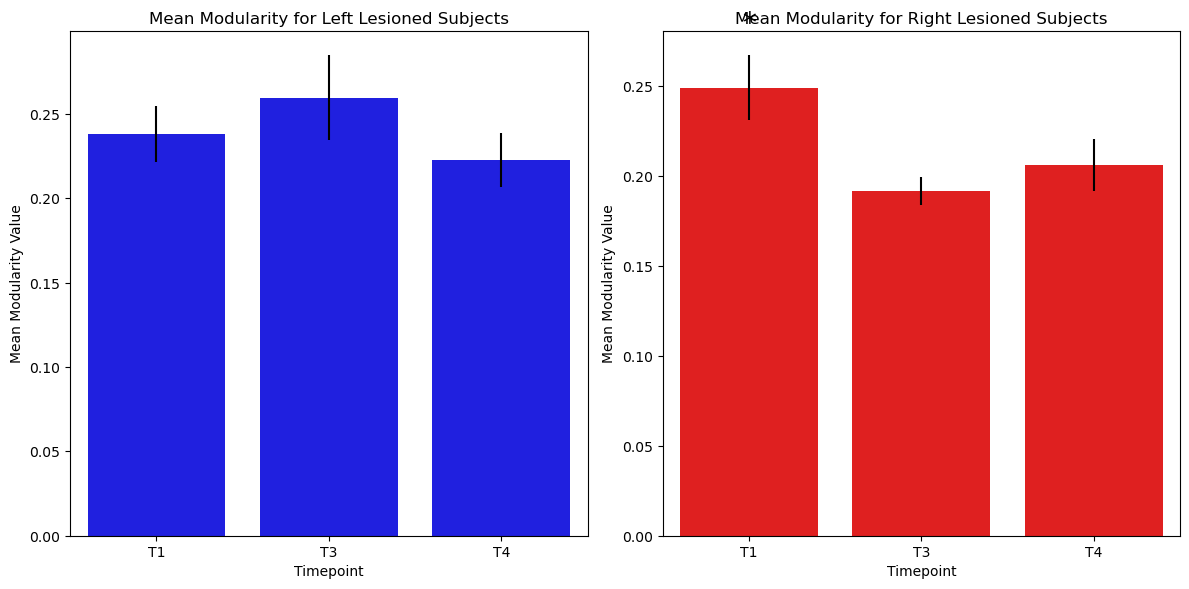

In [124]:
# Start with subject_id as a column, not an index
modularity_R = df_R[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in df_R.columns:
        modularity_R[tp] = df_R[tp].apply(functions.compute_modularity)

# Drop rows with missing values
t1_t3 = modularity_R[['T1_matrix', 'T3_matrix']].dropna()
t1_t4 = modularity_R[['T1_matrix', 'T4_matrix']].dropna()
t3_t4 = modularity_R[['T3_matrix', 'T4_matrix']].dropna()

# Paired t-tests
t3_stat, t3_p = wilcoxon(t1_t3['T1_matrix'], t1_t3['T3_matrix'])
t4_stat, t4_p = wilcoxon(t1_t4['T1_matrix'], t1_t4['T4_matrix'])
t3_t4_stat, t3_t4_p = wilcoxon(t3_t4['T3_matrix'], t3_t4['T4_matrix'])
print(f"T4 vs T3: t = {t3_t4_stat:.3f}, p = {t3_t4_p:.4f}")

print(f"T1 vs T3: t = {t3_stat:.3f}, p = {t3_p:.4f}")
print(f"T1 vs T4: t = {t4_stat:.3f}, p = {t4_p:.4f}")

print("Mean difference T1-T3:", (t1_t3['T1_matrix'] - t1_t3['T3_matrix']).mean())
print("Mean difference T1-T4:", (t1_t4['T1_matrix'] - t1_t4['T4_matrix']).mean())
print("Mean difference T3-T4:", (t3_t4['T3_matrix'] - t3_t4['T4_matrix']).mean())
print("Mean modularity T1:", modularity_R['T1_matrix'].mean())
print("Mean modularity T3:", modularity_R['T3_matrix'].mean())
print("Mean modularity T4:", modularity_R['T4_matrix'].mean())
# Plotting the modularity values for left and right lesioned subjects as bar charts
'''plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=modularity_L['subject_id'], y=modularity_L['T1_matrix'], color='blue', label='T1')
plt.title('Modularity for Left Lesioned Subjects (T1)')
plt.xlabel('Subject ID')
plt.ylabel('Modularity Value')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.barplot(x=modularity_R['subject_id'], y=modularity_R['T1_matrix'], color='red', label='T1')
plt.title('Modularity for Right Lesioned Subjects (T1)')
plt.xlabel('Subject ID')
plt.ylabel('Modularity Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()'''
# plotting the mean modularity values overtime for left and right lesioned subjects, as barplots

# Calculate means and standard errors
means_L = [modularity_L['T1_matrix'].mean(), modularity_L['T3_matrix'].mean(), modularity_L['T4_matrix'].mean()]
se_L = [modularity_L['T1_matrix'].std(ddof=1) / (len(modularity_L['T1_matrix'])**0.5),
    modularity_L['T3_matrix'].std(ddof=1) / (len(modularity_L['T3_matrix'])**0.5),
    modularity_L['T4_matrix'].std(ddof=1) / (len(modularity_L['T4_matrix'])**0.5)]
means_R = [modularity_R['T1_matrix'].mean(), modularity_R['T3_matrix'].mean(), modularity_R['T4_matrix'].mean()]
se_R = [modularity_R['T1_matrix'].std(ddof=1) / (len(modularity_R['T1_matrix'])**0.5),
    modularity_R['T3_matrix'].std(ddof=1) / (len(modularity_R['T3_matrix'])**0.5),
    modularity_R['T4_matrix'].std(ddof=1) / (len(modularity_R['T4_matrix'])**0.5)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=['T1', 'T3', 'T4'], y=means_L, yerr=se_L, color='blue', capsize=0.2)
plt.title('Mean Modularity for Left Lesioned Subjects')
plt.xlabel('Timepoint')
plt.ylabel('Mean Modularity Value')

# Add significance star if any pairwise comparison is significant (p < 0.05)
pvals_L = [
    wilcoxon(modularity_L['T1_matrix'].dropna(), modularity_L['T3_matrix'].dropna()).pvalue,
    wilcoxon(modularity_L['T1_matrix'].dropna(), modularity_L['T4_matrix'].dropna()).pvalue,
    wilcoxon(modularity_L['T3_matrix'].dropna(), modularity_L['T4_matrix'].dropna()).pvalue
]
for i, p in enumerate(pvals_L):
    if p < 0.05:
        plt.text(i, means_L[i] + se_L[i] + 0.01, '*', ha='center', va='bottom', color='black', fontsize=20)

plt.subplot(1, 2, 2)
sns.barplot(x=['T1', 'T3', 'T4'], y=means_R, yerr=se_R, color='red', capsize=0.2)
plt.title('Mean Modularity for Right Lesioned Subjects')
plt.xlabel('Timepoint')
plt.ylabel('Mean Modularity Value')

pvals_R = [
    wilcoxon(modularity_R['T1_matrix'].dropna(), modularity_R['T3_matrix'].dropna()).pvalue,
    wilcoxon(modularity_R['T1_matrix'].dropna(), modularity_R['T4_matrix'].dropna()).pvalue,
    wilcoxon(modularity_R['T3_matrix'].dropna(), modularity_R['T4_matrix'].dropna()).pvalue
]
for i, p in enumerate(pvals_R):
    if p < 0.05:
        plt.text(i, means_R[i] + se_R[i] + 0.01, '*', ha='center', va='bottom', color='black', fontsize=20)

plt.tight_layout()
plt.show()
